In [5]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')


In [4]:
!pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [6]:
phish_data = pd.read_csv('D:\My Class\CIP\phishing_site_urls.csv')

In [7]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [8]:

phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [9]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [10]:

phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [11]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

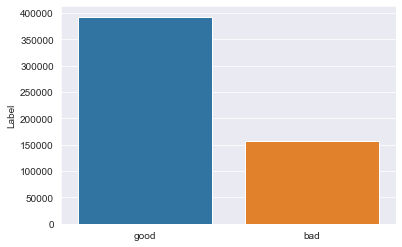

In [12]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [14]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [15]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [16]:

print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.9229601000000116 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized
35088,amigocard.freeoda.com/promocacartaoamigo2012/c...,bad,"[amigocard, freeoda, com, promocacartaoamigo, ..."
6275,'www.chinadcl.com/js/index.htm?us.battle.net/l...,bad,"[www, chinadcl, com, js, index, htm, us, battl..."
41087,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,bad,"[d, a, cb, a, a, s, sites, googlegroups, com, ..."
162803,current.com/shows/countdown/videos/keiths-spec...,good,"[current, com, shows, countdown, videos, keith..."
65607,tools.ietf.org/html/rfc1415,good,"[tools, ietf, org, html, rfc]"


In [18]:
stemmer = SnowballStemmer("english") # choose a language

In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 63.51811930000008 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
321351,empoweringeducators.com/index.html,good,"[empoweringeducators, com, index, html]","[empoweringeduc, com, index, html]"
458159,vent1.net/,good,"[vent, net]","[vent, net]"
475316,youtube.com/watch?v=ZfuZq7M4lTQ,good,"[youtube, com, watch, v, ZfuZq, M, lTQ]","[youtub, com, watch, v, zfuzq, m, ltq]"
434564,southernmodified.com/drivers/bloftin.htm,good,"[southernmodified, com, drivers, bloftin, htm]","[southernmodifi, com, driver, bloftin, htm]"
498428,kenestyonline.com/h782hd,bad,"[kenestyonline, com, h, hd]","[kenestyonlin, com, h, hd]"


In [21]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.24450539999998 sec


In [22]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
321683,encyclopedia.com/topic/Buster_Keaton.aspx,good,"[encyclopedia, com, topic, Buster, Keaton, aspx]","[encyclopedia, com, topic, buster, keaton, aspx]",encyclopedia com topic buster keaton aspx
31136,www.dizmobiliario.net/php_recursos/stgeorge/st...,bad,"[www, dizmobiliario, net, php, recursos, stgeo...","[www, dizmobiliario, net, php, recurso, stgeor...",www dizmobiliario net php recurso stgeorg stge...
305938,classmates.com/directory/college/Calvary%20Cha...,good,"[classmates, com, directory, college, Calvary,...","[classmat, com, directori, colleg, calvari, ch...",classmat com directori colleg calvari chapel b...
469874,yelp.com/c/berkeley/chocolate,good,"[yelp, com, c, berkeley, chocolate]","[yelp, com, c, berkeley, chocol]",yelp com c berkeley chocol
11397,x.co/juE1,bad,"[x, co, juE]","[x, co, jue]",x co jue


In [23]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [24]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [25]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [46]:
from webdriver_manager.chrome import ChromeDriverManager

browser= webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [C:\Users\mail2\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


In [37]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [47]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

In [48]:

for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

WebDriverException: Message: unknown error: net::ERR_CONNECTION_TIMED_OUT
  (Session info: chrome=89.0.4389.128)


In [49]:

df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [ ]:
df.head()

In [ ]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

In [50]:
#create cv object
cv = CountVectorizer()

In [51]:

feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [52]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [54]:

# create lr object
lr = LogisticRegression()

In [55]:
lr.fit(trainX,trainY)

LogisticRegression()

In [56]:
lr.score(testX,testY)

0.9643213409350722

In [57]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.978024751886488
Testing Accuracy : 0.9643213409350722

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.94     36501
        Good       0.99      0.96      0.98    100836

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

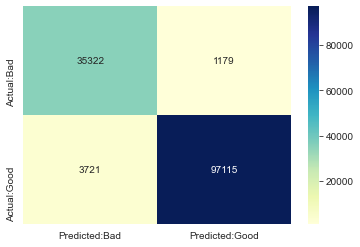

In [58]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [59]:
# create mnb object
mnb = MultinomialNB()

In [60]:

mnb.fit(trainX,trainY)

MultinomialNB()

In [61]:
mnb.score(testX,testY)

0.9582414061760487

In [62]:

Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9739228997424814
Testing Accuracy : 0.9582414061760487

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38218
        Good       0.98      0.97      0.97     99119

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

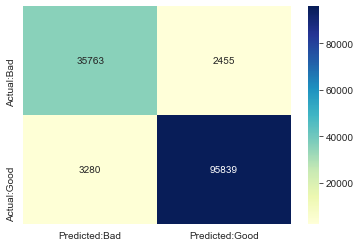

In [63]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

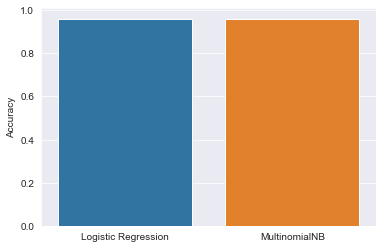

In [64]:

acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [65]:

pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [66]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [67]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [68]:

pipeline_ls.score(testX,testY)

0.9659378026314831

Training Accuracy : 0.9792577346611361
Testing Accuracy : 0.9659378026314831

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36866
        Good       0.99      0.97      0.98    100471

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

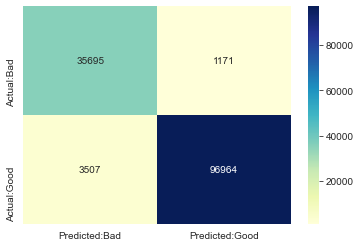

In [69]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [70]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [71]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9659378026314831


In [72]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


In [73]:
import uvicorn
from fastapi import FastAPI
import joblib,os

app = FastAPI()

#pkl
phish_model = open('phishing.pkl','rb')
phish_model_ls = joblib.load(phish_model)

# ML Aspect
@app.get('/predict/{feature}')
async def predict(features):
	X_predict = []
	X_predict.append(str(features))
	y_Predict = phish_model_ls.predict(X_predict)
	if y_Predict == 'bad':
		result = "This is a Phishing Site"
	else:
		result = "This is not a Phishing Site"

	return (features, result)
if __name__ == '__main__':
	uvicorn.run(app,host="127.0.0.1",port=8000)

RuntimeError: This event loop is already running